<a href="https://colab.research.google.com/github/KoshKath/DataScience_Lab3/blob/main/Lab3_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset URL: https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/7.67k [00:00<?, ?B/s]
100% 7.67k/7.67k [00:00<00:00, 26.3MB/s]
Файлы в директории:
['Students Social Media Addiction.csv']
   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2      

/content/visualize.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_values, y=y_values, palette='viridis')


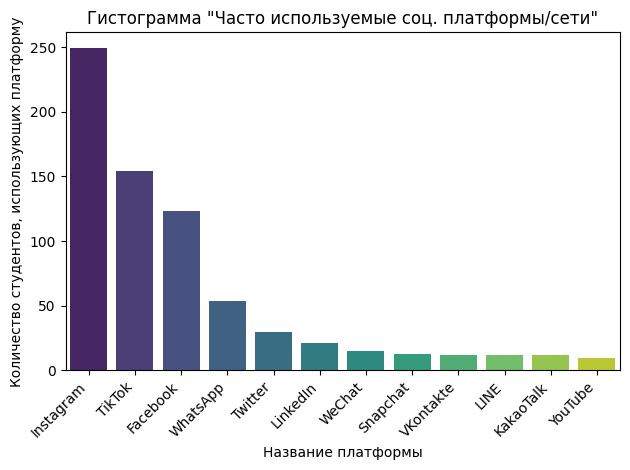

Академические уровни студентов:
('High School', 27)
('Graduate', 325)
('Undergraduate', 353)


/content/visualize.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_values, y=y_values, palette='viridis')


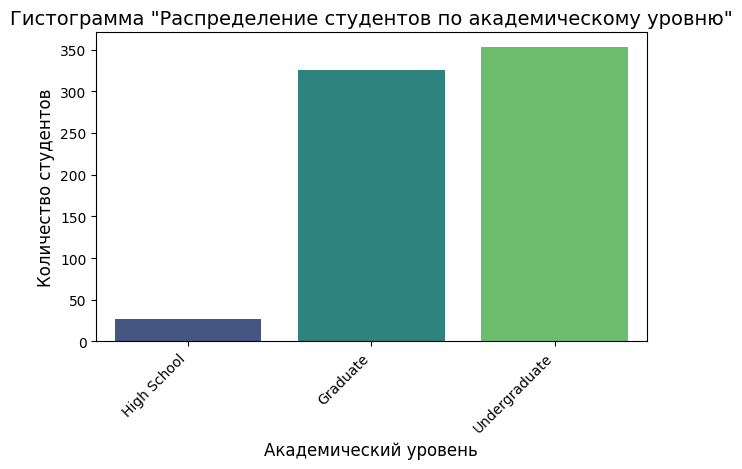

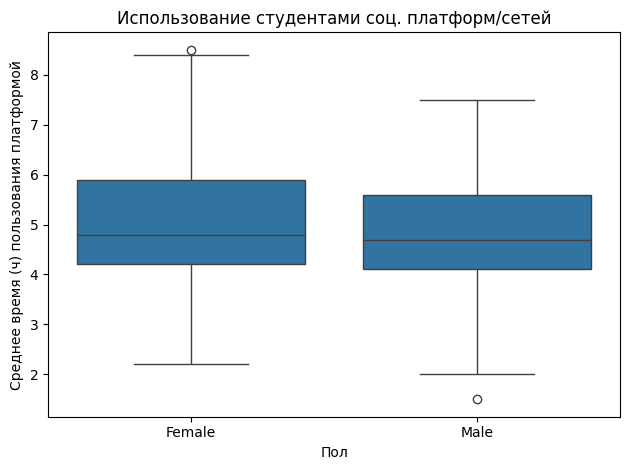

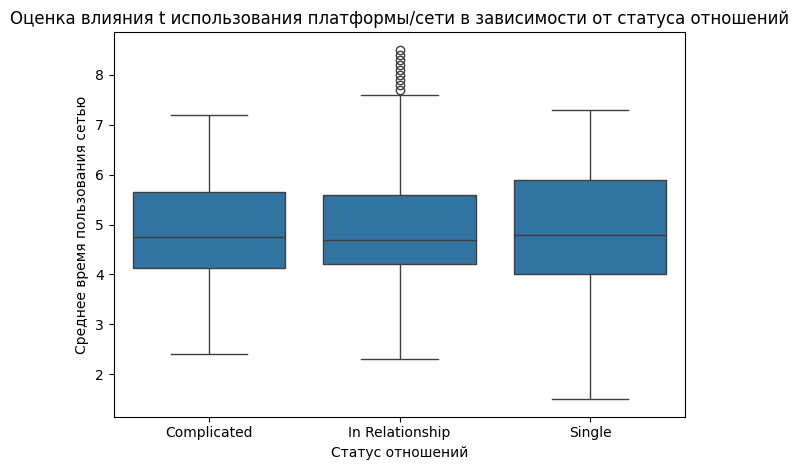

/content/visualize.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_values, y=y_values, palette='viridis')


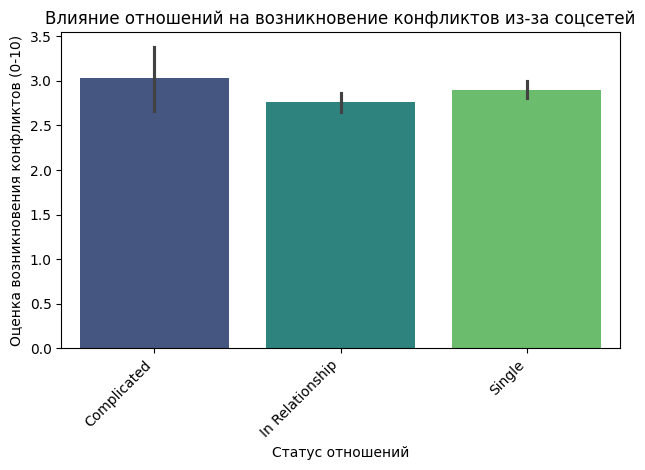

In [ ]:
# main.py
!pip install kaggle
import file_load as fl
import os
import shutil
import zipfile
import pandas as pd
import sqlite3
import db_module as dbm
import visualize as vz

# загрузка датасета из источника
#https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships

# определение пути источника и назначения
source_path = 'kaggle.json'
destination_dir = os.path.expanduser('~/.kaggle')
destination_path = os.path.join(destination_dir, 'kaggle.json')

# создание директорию назначения, если она не существует
os.makedirs(destination_dir, exist_ok=True)
# перемещение файла
shutil.move(source_path, destination_path)
# устанавление прав доступа
os.chmod(destination_path, 0o600)

!kaggle datasets download -d adilshamim8/social-media-addiction-vs-relationships

# распаковка скачанного архива
with zipfile.ZipFile('social-media-addiction-vs-relationships.zip', 'r') as zip_ref:
  zip_ref.extractall('social-media-addiction-vs-relationships')

# просмотр файлов в директории
print('Файлы в директории:')
print(os.listdir('social-media-addiction-vs-relationships'))

ds_path = 'social-media-addiction-vs-relationships/Students Social Media Addiction.csv'
df = fl.data_load(ds_path)

#создание БД
conn = sqlite3.connect('SSMediaAddiction.db')
cursor = conn.cursor()
cursor.execute('''
  CREATE TABLE IF NOT EXISTS additions (
    Student_ID INTEGER PRIMARY KEY,
    Age INTEGER,
    Gender TEXT,
    Academic_Level TEXT,
    Country TEXT,
    Avg_Daily_Usage_Hours REAL,
    Most_Used_Platform TEXT,
    Affects_Academic_Performance TEXT,
    Sleep_Hours_Per_Night REAL,
    Mental_Health_Score INTEGER,
    Relationship_Status TEXT,
    Conflicts_Over_Social_Media INTEGER,
    Addicted_Score INTEGER
  )
  ''')
conn.commit()
# запись данных из датасета (df) в таблицу БД additions
df.to_sql('additions', conn, if_exists='replace', index='False')
# вывод первых 10-ти записей из таблицы additions
print("Первые 10 записей из таблицы additions:")
cursor.execute("SELECT * FROM additions LIMIT 10")
rows = cursor.fetchall()
for row in rows:
  print(row)
conn.close()

# обращение к БД - запросы
# подключение к БД
db_name = "SSMediaAddiction.db"
connection = dbm.connect_db(db_name)

# show_avg_sleep_hours
sleep_hours = dbm.show_avg_sleep_hours(connection)
print (f"Средняя продолжительнотсь сна студентов, ч: {sleep_hours}")

#show_platform
platforms = dbm.show_platform(connection)
print ("Используемые студентами платформы/соцсети:")
for row in platforms:
  print(row)
#визуализация результата
vz.barplot_platforms(platforms)

# show_academic_level
academic_levels = dbm.show_academic_level(connection)
print (f"Академические уровни студентов:")
for row in academic_levels:
  print(row)
vz.barplot_academic_lvls(academic_levels)

# show_gender_use_hours
gender_use_hours = dbm.show_gender_use_hours(connection)
vz.boxplot_gender_use_hrs(gender_use_hours)

# show_relationship_use_hours
relationship_use_hours = dbm.show_relationship_use_hours(connection)
vz.boxplot_relationship_use_hrs(relationship_use_hours)

# show_relationship_conflict
relationship_conflict = dbm.show_relationship_conflict(connection)
vz.barplot_relationship_conflict(relationship_conflict)

# get_data_matrix   #data_matrix - dataframe
data_matrix = dbm.get_data_matrix(connection)
vz.correlation_matrix(data_matrix)